# Airlines Performance in Terms of Delay and Cancellation

## Investigation Overview

<p style="font-size:18px">My investigation aims to look at the leading causes of flight delays and cancellations and how they affect flight performance. I also wanted to discover the correlation between the delay and some factors that cause the flight delay. </p>

## Dataset Overview

<p style="font-size:18px">The original dataset folder contains datasets about flights for each year from 1987 to 2008. However, for this project, I used only datasets from 2005 to 2008 due to the magnificent size of the datasets. The combined datasets constitute over 28.74 million flight records in the US from 2005 to 2008. It has much detailed information, such as specific information about times of flights, delays and cancellations, airline companies, and destinations. </p>

In [1]:
# The first step is to import all needed libraryies
# This cell is devoted specificlly for importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline




In [2]:
# downloading the four dataset files into the notebook using pandas

_2005_df = pd.read_csv('dataset/2005.csv')
_2006_df = pd.read_csv('dataset/2006.csv')
_2007_df = pd.read_csv('dataset/2007.csv')
_2008_df = pd.read_csv('dataset/2008.csv')

In [3]:
# combining the four datasets into one pandas dataframe

dfs = [_2005_df,_2006_df,_2007_df,_2008_df]
flight_df = pd.concat(dfs)

In [4]:
# There are some cloumns I do not need in my explanatory analysis, those columns need to be dropped

flight_df.drop(columns = ['CRSDepTime','FlightNum','TailNum','ActualElapsedTime','CRSElapsedTime','TaxiIn','TaxiOut','Diverted'])

Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime  CRSArrTime  \
0        2005      1          28          5   1603.0   1741.0        1759   
1        2005      1          29          6   1559.0   1736.0        1759   
2        2005      1          30          7   1603.0   1741.0        1805   
3        2005      1          31          1   1556.0   1726.0        1759   
4        2005      1           2          7   1934.0   2235.0        2232   
...       ...    ...         ...        ...      ...      ...         ...   
7009723  2008     12          13          6   1002.0   1204.0        1150   
7009724  2008     12          13          6    834.0   1021.0        1023   
7009725  2008     12          13          6    655.0    856.0         856   
7009726  2008     12          13          6   1251.0   1446.0        1437   
7009727  2008     12          13          6   1110.0   1413.0        1418   

        UniqueCarrier  AirTime  ArrDelay  ...  Origin Dest Distance  \
0                  UA    131.0     -18.0  ...     BOS  ORD      867   
1                  UA    136.0     -23.0  ...     BOS  ORD      867   
2                  UA    131.0     -24.0  ...     BOS  ORD      867   
3                  UA    129.0     -33.0  ...     BOS  ORD      867   
4                  UA    106.0       3.0  ...     ORD  BOS      867   
...               ...      ...       ...  ...     ...  ...      ...   
7009723            DL     71.0      14.0  ...     ATL  IAD      533   
7009724            DL    139.0      -2.0  ...     ATL  SAT      874   
7009725            DL     85.0       0.0  ...     PBI  ATL      545   
7009726            DL     89.0       9.0  ...     IAD  ATL      533   
7009727            DL    104.0      -5.0  ...     SAT  ATL      874   

         Cancelled  CancellationCode CarrierDelay  WeatherDelay  NASDelay  \
0                0               NaN          0.0           0.0       0.0   
1                0               NaN          0.0           0.0       0.0   
2                0               NaN          0.0           0.0       0.0   
3                0               NaN          0.0           0.0       0.0   
4                0               NaN          0.0           0.0       0.0   
...            ...               ...          ...           ...       ...   
7009723          0               NaN          NaN           NaN       NaN   
7009724          0               NaN          NaN           NaN       NaN   
7009725          0               NaN          NaN           NaN       NaN   
7009726          0               NaN          NaN           NaN       NaN   
7009727          0               NaN          NaN           NaN       NaN   

         SecurityDelay  LateAircraftDelay  
0                  0.0                0.0  
1                  0.0                0.0  
2                  0.0                0.0  
3                  0.0                0.0  
4                  0.0                0.0  
...                ...                ...  
7009723            NaN                NaN  
7009724            NaN                NaN  
7009725            NaN                NaN  
7009726            NaN                NaN  
7009727            NaN                NaN  

[28745461 rows x 21 columns]

## The most prevalent flight cancellations reasons.

<p style="font-size:18px">In the dataset we have four unique fligh cancellations codes.<br> <br>A = carrier<br> B = weather<br> C = NAS (national aviation system)<br> D = security<br><br><br> The following chart will show the popularity of each cancellation code.</p>

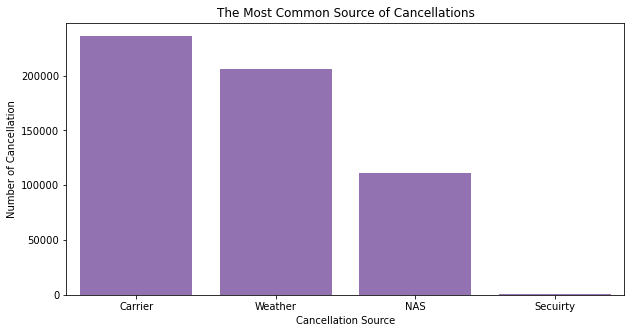

In [5]:
sub_df = flight_df[flight_df.CancellationCode.isna()==False]
Cancel_Code = flight_df.CancellationCode.value_counts()
ticks = ['Carrier','Weather','NAS','Secuirty']
color_base = sns.color_palette()[4]
plt.figure(figsize=(10,5))
chart = sns.countplot(data=sub_df, x='CancellationCode', color = color_base, order =Cancel_Code.index );
plt.title('The Most Common Source of Cancellations', fontsize=12)
plt.xlabel('Cancellation Source')
plt.ylabel('Number of Cancellation')
chart.set_xticklabels(ticks);

<p style="font-size:18px">The bar chart above tells us that there are mainly three cancellations sources that caused almost most of the cancellations. Carrier had the highest number of cancellations, with over 200k cancellations. Weather comes next, with about 200,000 flight cancellations. After that comes NAS, which means cancellations attributed to the national aviation system that can be duo many different circumstances, including non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control, with slightly over 100,000 flight cancellations. Finally, the chart shows that security had very few cancellation instances.</p>

##  Flight Cancellations per Months and Days of Week.

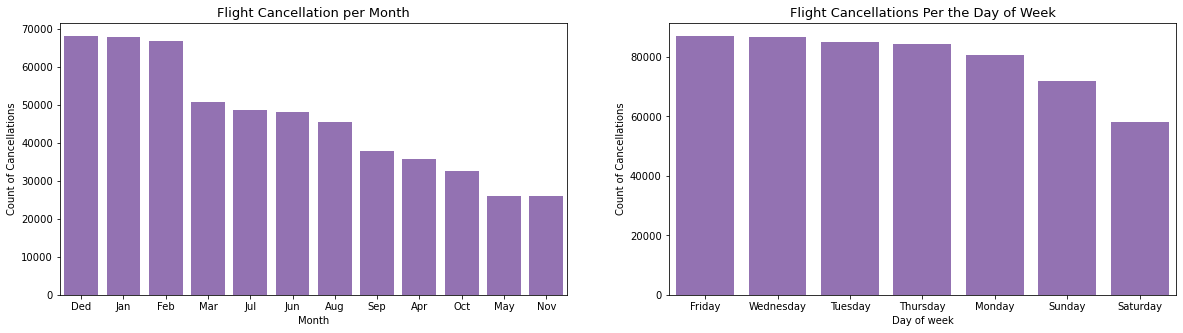

In [6]:
month_ord = sub_df.Month.value_counts().index
day_of_w_ord = sub_df.DayOfWeek.value_counts().index

plt.figure(figsize = [20, 5]) 
# Plot flight cancellation per month
plt.subplot(1, 2, 1) 
M_ticks = ['Ded','Jan','Feb', 'Mar','Jul','Jun','Aug', 'Sep','Apr','Oct','May','Nov']
chart_1 = sns.countplot(data = sub_df, x = 'Month', color = color_base
              , order = month_ord)
chart_1.set_xticklabels(M_ticks)
plt.title('Flight Cancellation per Month', fontsize =13)
plt.ylabel('Count of Cancellations')

# plot flight cancellation per day of week
plt.subplot(1, 2, 2)
D_ticks = ['Friday', 'Wednesday', 'Tuesday','Thursday','Monday','Sunday','Saturday']
Chart_2 = sns.countplot(data = sub_df, x = 'DayOfWeek', color = color_base,order = day_of_w_ord)
Chart_2.set_xticklabels(D_ticks)
plt.title('Flight Cancellations Per the Day of Week', fontsize =13)
plt.ylabel('Count of Cancellations')
plt.xlabel('Day of week');



<p style="font-size:18px">We can obviously see that December, January, and February have the highest flight cancellations numbers. Those are winter months in the US, so it might be related to the weather, but it needs further analysis to confirm.<br><br>Regarding the chart of the cancellations per day of the week, it's kind of expected that Friday would have the highest number of flight cancellations, but in general there are not much of differences between the other days</p>

##  Flight Cancellations related to weather per Months

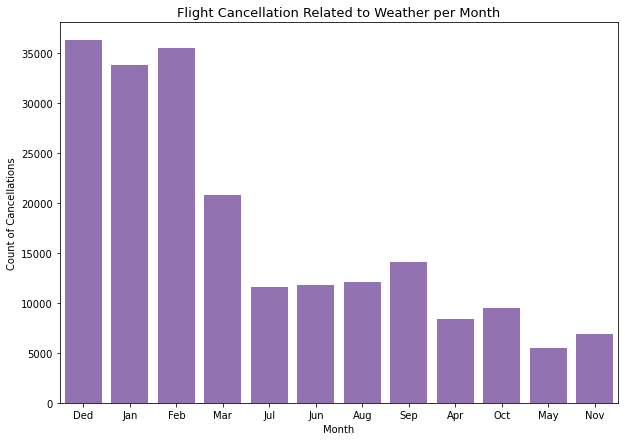

In [7]:
weather_df = flight_df[flight_df.CancellationCode == "B"]
plt.figure(figsize = [10, 7]) 


M_ticks = ['Ded','Jan','Feb', 'Mar','Jul','Jun','Aug', 'Sep','Apr','Oct','May','Nov']
chart_1 = sns.countplot(data = weather_df, x = 'Month', color = color_base
              , order = month_ord)
chart_1.set_xticklabels(M_ticks)
plt.title('Flight Cancellation Related to Weather per Month', fontsize =13)
plt.ylabel('Count of Cancellations');

<p style="font-size:18px">As expected, weather played as major factor for cancellation during winter months</p>

## Which airports had the most flight cancellation number?

<p style="font-size:18px">In the following chart, I will plot a bar chart with the top 10 airports regarding flight cancellations.</p>

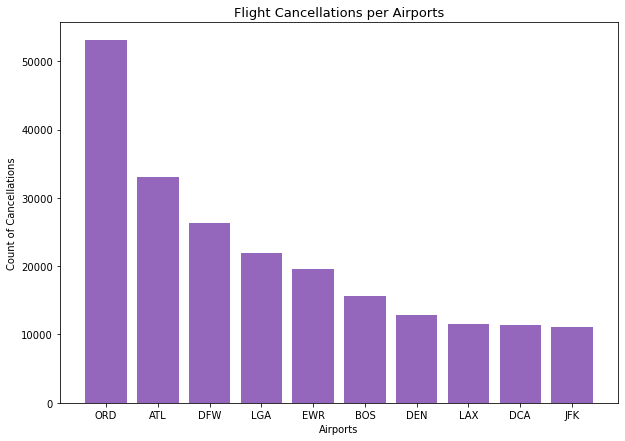

In [8]:

dep_city = sub_df.Origin.value_counts().head(10)

plt.figure(figsize = [10, 7]) 

plt.bar(x = dep_city.index, height = dep_city.values,color = color_base);
plt.title('Flight Cancellations per Airports', fontsize =13)
plt.ylabel('Count of Cancellations')
plt.xlabel('Airports');

<p style="font-size:18px">It appears that Orlando's airport had significantly the highest number of flight cancellations, with more than 50,000 flight cancellations from 2005 to 2008. JFK had the least number of flight cancellations on the list, but that does not mean it's the best among all airports in the dataset since the chart above only shows the ten highest airports in terms of flight cancellations.</p>

## Flight Cancellation Reasons per Each Month

<br><p style="font-size:18px">Now, let's put each month in a chart with all cancellation reasons to see if the weather indeed plays as a major factor during the winter months</p>


In [9]:
flight_copy = flight_df.copy()

flight_copy['Month']=flight_copy.Month.astype('str').replace({'1':'January','2':'February', '3':'March','4':'April','5':'May','6':'June','7':'July','8':'August', '9':'September','10':'October','11':'November','12':'December'},)
months = pd.api.types.CategoricalDtype(ordered = True, categories = ['January','February', 'March','April','May','June','July','August', 'September','October','November','December'])

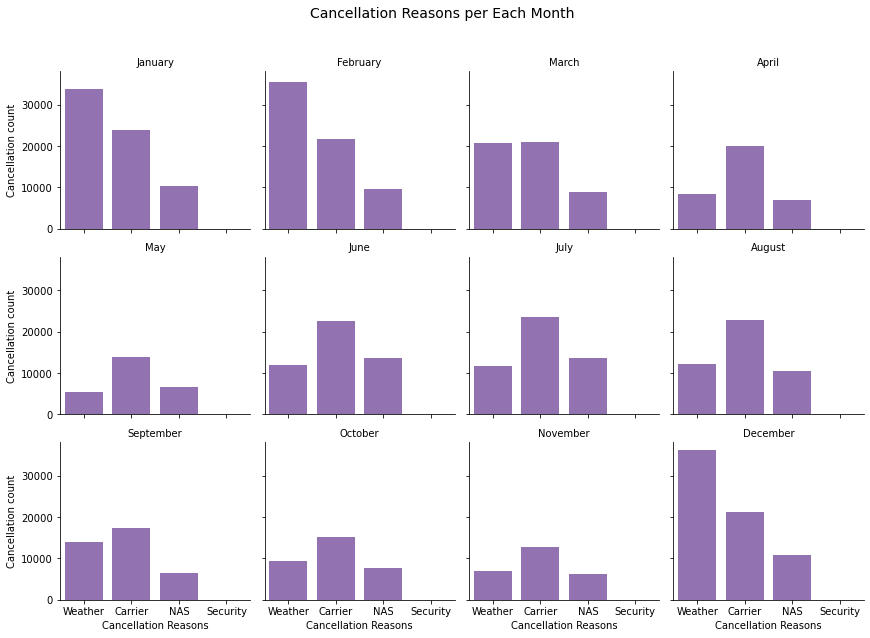

In [10]:
# color_base = sns.color_palette()[2]


g = sns.FacetGrid(data = flight_copy, col = 'Month',col_wrap=4, height=3)
g.map(sns.countplot,'CancellationCode',color = color_base, order = ['B','A','C','D'])
g.set_titles("{col_name}");
g.fig.suptitle('Cancellation Reasons per Each Month', fontsize=14)
g.set_xlabels('Cancellation Reasons')
g.set_ylabels('Cancellation count')
plt.subplots_adjust(top=0.88)
g.set_xticklabels(['Weather','Carrier','NAS','Security']);


<p style="font-size:18px">It's clear that winter months recorded higher numbers of flight cancellations related to the weather more than the other months. </p>

## Which airline companies had the highest number of cancellation regarding each cancellation reason?

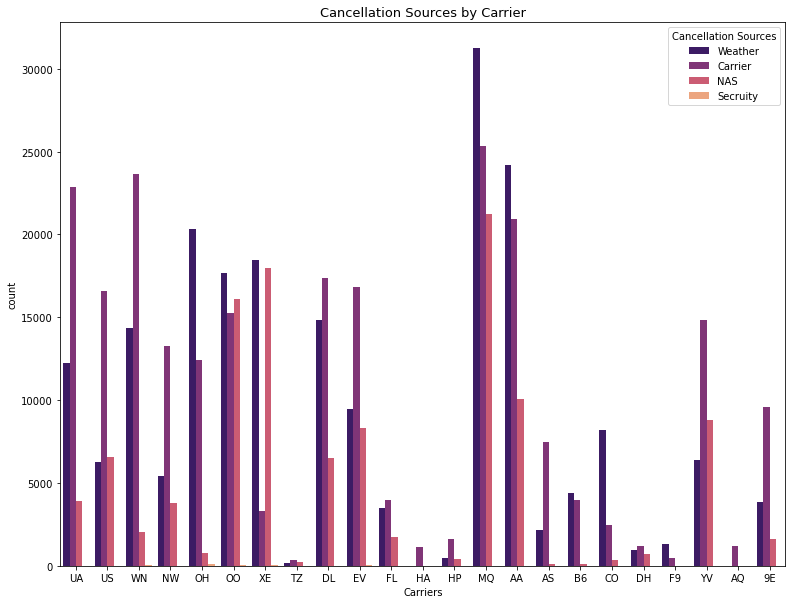

In [11]:
plt.figure(figsize=(13,10))
sns.countplot(data = flight_df , x = 'UniqueCarrier', hue = 'CancellationCode', palette = 'magma');
plt.legend(title='Cancellation Sources', loc='upper right', labels=['Weather', 'Carrier', 'NAS','Secruity'])
plt.title('Cancellation Sources by Carrier', fontsize = 13)
plt.xlabel('Carriers')
plt.show();

<p style="font-size:18px">It's obvious from the above chart that Envoy Air airline (MQ)) had canceled more flights than all the other airlines, and it also had been subject to more flight cancellations related to weather than the others. American Airlines and United Airlines had high flight cancellation numbers, but they had been less subject to weather and NAS cancellations than Envoy Air airline. Tsaradia airlines (TZ) had a noticeable few flight cancellations, but that is not surprising since it is a domestic airline company and it only has 10 destinations </p>

## What is the average delay time per airline company?

<br><p style="font-size:18px">In the following cells, I will group the data by the airline companies and calculate the average departure delay for each carrier. Then, I will need to sort the values in descending order. After that, I will create a bar chart using the seaborn barplot() function to show the delay per each airline company in descending order. I will also use random samples of 2 million records. </p> <br><br>

In [31]:
airl_order = flight_df.groupby(['UniqueCarrier']).DepDelay.mean().sort_values(ascending=False).index

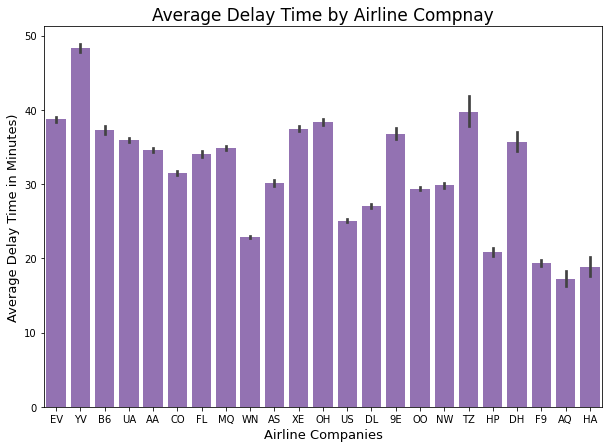

In [45]:

plt.figure(figsize=[10,7])

sns.barplot(data=flight_df[flight_df.DepDelay>0].sample(2000000),
            x='UniqueCarrier',
            y='DepDelay',
            order =airl_order,
            color=color_base)

plt.title('Average Delay Time by Airline Compnay',fontsize=17)
plt.ylabel('Average Delay Time in Minutes)',fontsize=13)
plt.xlabel('Airline Companies',fontsize=13);




<p style="font-size:18px">The above chart shows that YV (Mesa Airlines) had the greatest average of the departure delay time. The chart also highlights that 9 Air (AQ) airlines had the smallest average of departure delays. </p> 

<br><br> 
## What is the average arrival delay time per destination?

<p style="font-size:18px">Here, I will limit the amount of data to include only data about the top 10 destination airports. The reason I am doing this is that we have so many destinations in the dataset. I will also use random samples of 1 million records. </p> <br>

In [35]:
dest = sub_df.Dest.value_counts(ascending=False).head(10).index.tolist()
arr_df = flight_df[flight_df.Dest.isin(dest)]

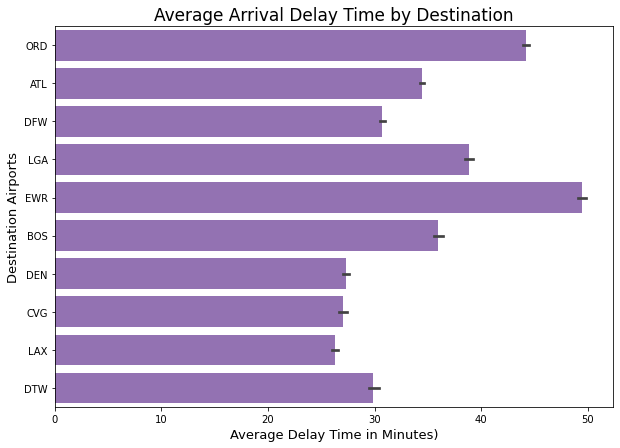

In [49]:
plt.figure(figsize=[10,7])

sns.barplot(data=arr_df[arr_df.ArrDelay>0].sample(1000000),
            y='Dest',
            x='ArrDelay',
            order = dest,
            color=color_base
           )

plt.title('Average Arrival Delay Time by Destination',fontsize=17)
plt.xlabel('Average Delay Time in Minutes)',fontsize=13)
plt.ylabel('Destination Airports',fontsize=13);





<br><p style="font-size:18px">As we can see from the above horizontal bar char, the Bosten airport had the highest average arrival delays than any other destinations listed in the chart. On the other hand, Los Angelos airport had the least average delay time among the other; however, that doesn't mean it's the best among all the destinations in the entire dataset. although It's the best of the worst ten destinations in the dataset we have in terms of average arrival delays by destination.</p> <br>

### What is the correlation coefficients between Arrival Delay and the reasons of dealys listed in the dataset 

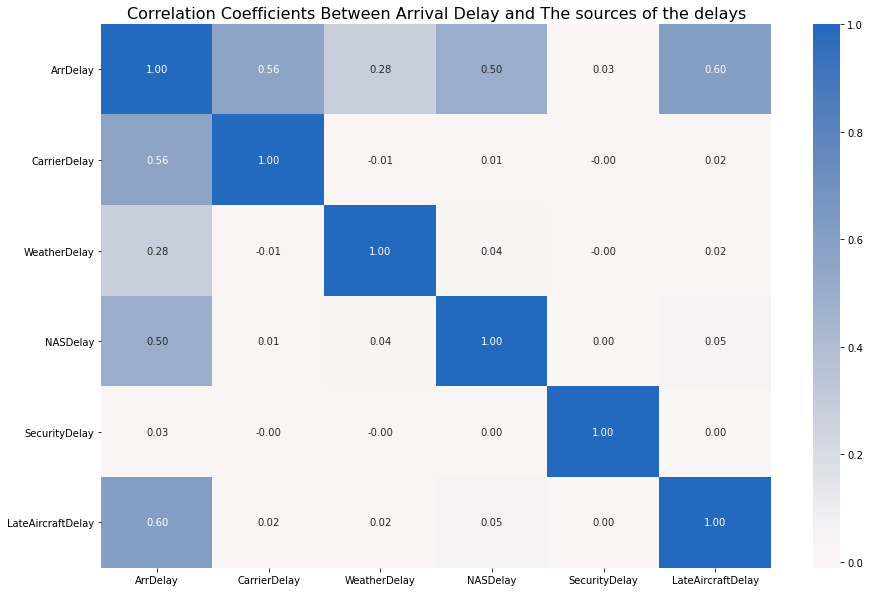

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(flight_df[['ArrDelay','CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.yticks(rotation = 0)


plt.title('Correlation Coefficients Between Arrival Delay and The sources of the delays', fontsize = 16);

<br><p style="font-size:18px">Above in the heatmap, we can see the correlation coefficients between the arrival delay and each cause of the delay. There is a moderate positive correlation between late aircraft, NAS, weather, carrier delays, and arrival delays. The strongest correlations among those are the late aircraft delay and carrier delay, with a correlation coefficient of 0.6. On the other hand, the above heatmap shows no correlation between security delay and arrival delay since their correlation coefficient is 0.03.</p>